# EDA to connect JSON category names to ID

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../data/trends/USvideos.csv")
df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


In [9]:
np.sort(df["category_id"].unique())

array([ 1,  2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43])

In [10]:
df["category_id"].unique().size

16

In [23]:
dfson = pd.read_json("../../data/trends/US_category_id.json", orient='columns')
dfson.head(3)

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [25]:
dfson["items"][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [26]:
dfson["items"][0]["id"]

'1'

In [34]:
dfson["items"].size

32

In [32]:
dfson["items"][25]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/i5-_AceGXQCEEMWU0V8CcQm_vLQ"',
 'id': '38',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Foreign',
  'assignable': False}}

In [33]:
cat_dict = {}
for cat in dfson["items"]:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [38]:
len(cat_dict)

32

In [39]:
df['category_name'] = df['category_id'].map(cat_dict)

In [40]:
df["category_name"].head(10)

0          People & Blogs
1           Entertainment
2                  Comedy
3           Entertainment
4           Entertainment
5    Science & Technology
6           Entertainment
7    Science & Technology
8        Film & Animation
9         News & Politics
Name: category_name, dtype: object

In [41]:
df["category_name"].value_counts()

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category_name, dtype: int64

In [55]:
df["category_name"].value_counts().to_frame().reset_index()

,index,category_name
0,Entertainment,9964
1,Music,6472
2,Howto & Style,4146
3,Comedy,3457
4,People & Blogs,3210
5,News & Politics,2487
6,Science & Technology,2401
7,Film & Animation,2345
8,Sports,2174
9,Education,1656


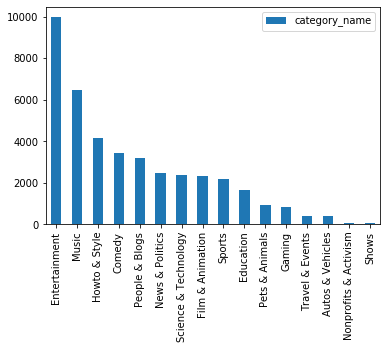

In [52]:
df["category_name"].value_counts().to_frame().plot.bar()

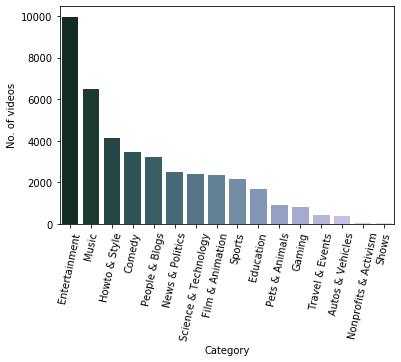

In [78]:
catdata = df["category_name"].value_counts().to_frame().reset_index()
sel_pal = sns.cubehelix_palette(n_colors=16, start=2.1, reverse=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="index", y="category_name", data=catdata, 
                palette=sel_pal, ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=78)
_ = ax.set(xlabel="Category", ylabel="No. of videos")